**ETA MODEL**

**DATA LOADING & PREPROCESSING**

In [1]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Predictive ETA Model/historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
copy=df.copy()
copy

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [ ]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


**Handling Missing Values**

In [2]:
# Dropping the rows with missing values
df=df.dropna(subset=['actual_delivery_time'])
df=df.dropna(subset=['market_id'])
df=df.dropna(subset=['store_primary_category'])
df=df.dropna(subset=['order_protocol'])


df['total_onshift_dashers']=df['total_onshift_dashers'].fillna(df['total_onshift_dashers'].median())
df['total_busy_dashers']=df['total_busy_dashers'].fillna(df['total_busy_dashers'].median())
df['total_outstanding_orders']=df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())

df['estimated_store_to_consumer_driving_duration']=df['estimated_store_to_consumer_driving_duration'].fillna(df['estimated_store_to_consumer_driving_duration'].mean())

<ipython-input-2-35060142ad7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_onshift_dashers']=df['total_onshift_dashers'].fillna(df['total_onshift_dashers'].median())
<ipython-input-2-35060142ad7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_busy_dashers']=df['total_busy_dashers'].fillna(df['total_busy_dashers'].median())
<ipython-input-2-35060142ad7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


**Fixing Data Types**

In [3]:
# Datetime Conversion
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

# Integer Conversion
df['total_onshift_dashers']=df['total_onshift_dashers'].astype(int)
df['total_busy_dashers']=df['total_busy_dashers'].astype(int)
df['total_outstanding_orders']=df['total_outstanding_orders'].astype(int)

# Float Conversion
df['subtotal']=df['subtotal'].astype(float)
df['min_item_price']=df['min_item_price'].astype(float)
df['max_item_price']=df['max_item_price'].astype(float)
df['estimated_order_place_duration']=df['estimated_order_place_duration'].astype(float)

**Create Target Variable**

In [4]:
df['delivery_duration_seconds'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,int64
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,float64
num_distinct_items,int64
min_item_price,float64


**Standardize Money Features**

In [5]:
# Convert money-related columns (e.g., subtotal, min_item_price, max_item_price) from cents to dollars.

df['subtotal']=df['subtotal']/100
df['min_item_price']=df['min_item_price']/100
df['max_item_price']=df['max_item_price']/100

**Extract Time-Based Features**

In [6]:
# Extract meaningful features from timestamps (e.g., hour, day of the week).

df['created_hour']=df['created_at'].dt.hour
df['dayofweek']=df['created_at'].dt.dayofweek
df['weekend_flag'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['month_created'] = df['created_at'].dt.month
# Extract date and time features
df['created_hour'] = df['created_at'].dt.hour
df['created_day'] = df['created_at'].dt.day
df['created_month'] = df['created_at'].dt.month
df['created_weekday'] = df['created_at'].dt.weekday

df['actual_delivery_hour'] = df['actual_delivery_time'].dt.hour
df['actual_delivery_day'] = df['actual_delivery_time'].dt.day
df['actual_delivery_month'] = df['actual_delivery_time'].dt.month
df['actual_delivery_weekday'] = df['actual_delivery_time'].dt.weekday

# Drop original datetime columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)


**Item-related Features**

In [7]:
df['item_price_range'] = df['max_item_price'] - df['min_item_price']
df['item_price_ratio'] = df['min_item_price'] / (df['max_item_price'] + 1e-5)  # Avoid division by zero


**Dashers-related Features**

In [8]:
df['dasher_load'] = df['total_busy_dashers'] / (df['total_onshift_dashers'] + 1e-5)
df['dashers_pending_orders'] = df['total_outstanding_orders'] / (df['total_onshift_dashers'] + 1e-5)


**Order-related Features**

In [9]:
df['item_density'] = df['total_items'] / (df['num_distinct_items'] + 1e-5)


**Estimated Duration Features**

In [10]:
df['total_estimated_duration'] = df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration']


In [11]:
df['lag_1_order'] = df['total_items'].shift(1)
df['lag_1_subtotal'] = df['subtotal'].shift(1)


**Encode Categorical Feaures**

In [ ]:
df.dtypes

,0
market_id,float64
store_id,int64
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,float64
num_distinct_items,int64
min_item_price,float64
max_item_price,float64
total_onshift_dashers,int64


In [ ]:
print("Number of categories in 'store_primary_category' column: ",df['store_primary_category'].nunique())

print("Number of categories in 'order_protocol' column: ",df['order_protocol'].nunique())

print("Number of categories in 'store_id' column: ",df['store_id'].nunique())

print("Number of categories in 'market_id' column: ",df['market_id'].nunique())

Number of categories in 'store_primary_category' column:  74
Number of categories in 'order_protocol' column:  7
Number of categories in 'store_id' column:  6567
Number of categories in 'market_id' column:  6


**Target Encoding** is a suitable choice here due to the column's large number of categories and the absence of an inherent order.

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Calculate the target variable's mean (delivery_duration_seconds) for each category.

mean_target=df.groupby('store_primary_category')['delivery_duration_seconds'].mean()

# Map the mean target values back to the original dataframe
df['store_primary_category_encoded']=df['store_primary_category'].map(mean_target)

# Market-id
mean_market_id = df.groupby('market_id')['delivery_duration_seconds'].mean()
df['market_id_encoded'] = df['market_id'].map(mean_market_id)

# Store-id
global_mean = df['delivery_duration_seconds'].mean()
store_id_stats = df.groupby('store_id')['delivery_duration_seconds'].agg(['mean', 'count'])

smoothing_factor = 10  # Adjust as needed
store_id_stats['smoothed_mean'] = (
    (store_id_stats['mean'] * store_id_stats['count'] + global_mean * smoothing_factor) /
    (store_id_stats['count'] + smoothing_factor)
)

df['store_id_encoded'] = df['store_id'].map(store_id_stats['smoothed_mean'])



# Order-protocol
mean_order_protocol = df.groupby('order_protocol')['delivery_duration_seconds'].mean()
df['order_protocol_encoded'] = df['order_protocol'].map(mean_order_protocol)


In [13]:
# Drop original categorical columns (if they have been encoded)
df = df.drop(columns=['store_primary_category', 'market_id', 'store_id', 'order_protocol'])


In [ ]:
df.dtypes

,0
total_items,int64
subtotal,float64
num_distinct_items,int64
min_item_price,float64
max_item_price,float64
total_onshift_dashers,int64
total_busy_dashers,int64
total_outstanding_orders,int64
estimated_order_place_duration,float64
estimated_store_to_consumer_driving_duration,float64


In [ ]:
df['delivery_duration_seconds'].skew()

433.59821804505737

**Log Transformation**

In [14]:
import numpy as np
from scipy.stats import skew

# Apply log transformation using .loc to avoid the SettingWithCopyWarning
df.loc[:, 'log_delivery_duration_seconds'] = np.log1p(df['delivery_duration_seconds'])

# Calculate skewness
skewness_log = skew(df['log_delivery_duration_seconds'])
print(f"Skewness: {skewness_log}")

Skewness: 0.20951602800484542


**Square Root Transformation**

In [ ]:
# Apply Square Root transformation
df.loc[:, 'sqrt_delivery_duration_seconds'] = np.sqrt(df['delivery_duration_seconds'])

# Calculate skewness
skewness_sqrt = skew(df['sqrt_delivery_duration_seconds'])
print(f"Skewness: {skewness_sqrt}")

Skewness: 73.79168399452782


**Cube Root Transformation**

In [ ]:
# Apply cube root transformation
df.loc[:,'cbrt_delivery_duration_seconds'] = np.cbrt(df['delivery_duration_seconds'])
# Calculate skewness
skewness_cbrt = skew(df['cbrt_delivery_duration_seconds'])
print(f"Skewness: {skewness_cbrt}")

Skewness: 7.295584542493272


In [ ]:
# Drop the transformed target columns (square root and cube root)
df = df.drop(columns=['sqrt_delivery_duration_seconds', 'cbrt_delivery_duration_seconds'])


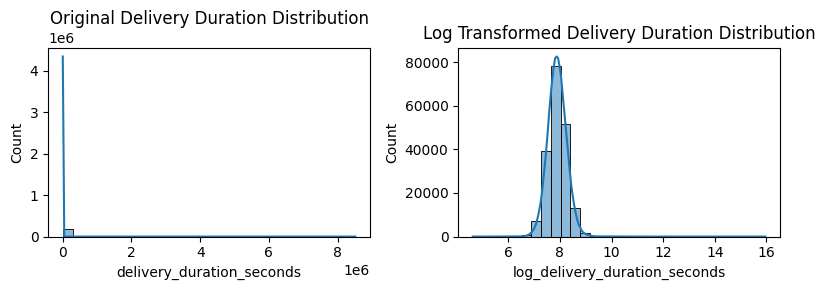

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original data distribution (before transformation)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['delivery_duration_seconds'], kde=True, bins=30)
plt.title("Original Delivery Duration Distribution")

# Visualize the transformed data distribution (after log transformation)
plt.subplot(1, 2, 2)
sns.histplot(df['log_delivery_duration_seconds'], kde=True, bins=30)
plt.title("Log Transformed Delivery Duration Distribution")

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import skew

Q1 = df['log_delivery_duration_seconds'].quantile(0.25)
Q3 = df['log_delivery_duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_filtered = df[(df['log_delivery_duration_seconds'] >= Q1 - 1.5 * IQR) &
                 (df['log_delivery_duration_seconds'] <= Q3 + 1.5 * IQR)]
print(df_filtered['log_delivery_duration_seconds'].skew())

0.03500638852867797


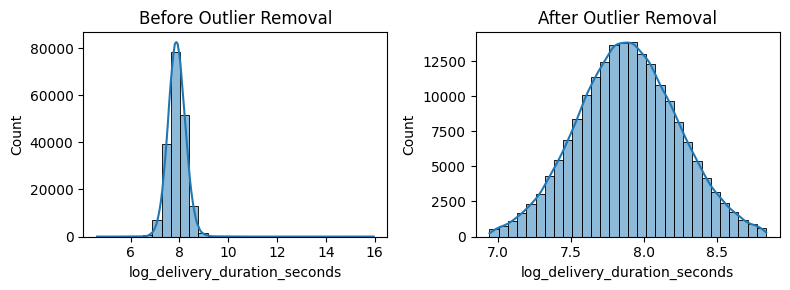

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original data distribution (before transformation)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['log_delivery_duration_seconds'], kde=True, bins=30)
plt.title("Before Outlier Removal")

# Visualize the transformed data distribution after outlier removal
plt.subplot(1, 2, 2)
sns.histplot(df_filtered['log_delivery_duration_seconds'], kde=True, bins=30)
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

**Drop Irrelevant Columns**

In [ ]:
df_filtered.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'delivery_duration_seconds', 'created_hour', 'dayofweek',
       'weekend_flag', 'month_created', 'created_day', 'created_month',
       'created_weekday', 'actual_delivery_hour', 'actual_delivery_day',
       'actual_delivery_month', 'actual_delivery_weekday', 'item_price_range',
       'item_price_ratio', 'dasher_load', 'dashers_pending_orders',
       'item_density', 'total_estimated_duration', 'lag_1_order',
       'lag_1_subtotal', 'store_primary_category_encoded', 'market_id_encoded',
       'store_id_encoded', 'order_protocol_encoded',
       'log_delivery_duration_seconds'],
      dtype='object')

In [17]:
# Select only numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Display correlation with the target
print("\nCorrelation with log_delivery_duration_seconds:")
print(correlation_matrix['log_delivery_duration_seconds'])


Correlation with log_delivery_duration_seconds:
total_items                                     0.127638
subtotal                                        0.238478
num_distinct_items                              0.173154
min_item_price                                  0.016966
max_item_price                                  0.150068
total_onshift_dashers                           0.105749
total_busy_dashers                              0.124968
total_outstanding_orders                        0.211798
estimated_order_place_duration                  0.103439
estimated_store_to_consumer_driving_duration    0.266785
delivery_duration_seconds                       0.974757
weekend_flag                                    0.077854
item_price_range                                0.144915
item_price_ratio                               -0.096791
dasher_load                                     0.001668
dashers_pending_orders                          0.015949
item_density                           

In [18]:
# List of columns to drop
columns_to_drop = ['min_item_price','weekend_flag','item_price_ratio','dasher_load','item_density','lag_1_order',
                   'lag_1_subtotal','delivery_duration_seconds']
df_filtered = df_filtered.drop(columns=columns_to_drop)


Correlation with log_delivery_duration_seconds:
total_items                                     0.127638
subtotal                                        0.238478
num_distinct_items                              0.173154
max_item_price                                  0.150068
total_onshift_dashers                           0.105749
total_busy_dashers                              0.124968
total_outstanding_orders                        0.211798
estimated_order_place_duration                  0.103439
estimated_store_to_consumer_driving_duration    0.266785
item_price_range                                0.144915
dashers_pending_orders                          0.015949
total_estimated_duration                        0.288765
store_primary_category_encoded                  0.095485
market_id_encoded                               0.082249
store_id_encoded                                0.056024
order_protocol_encoded                          0.097715
log_delivery_duration_seconds          

<Axes: >

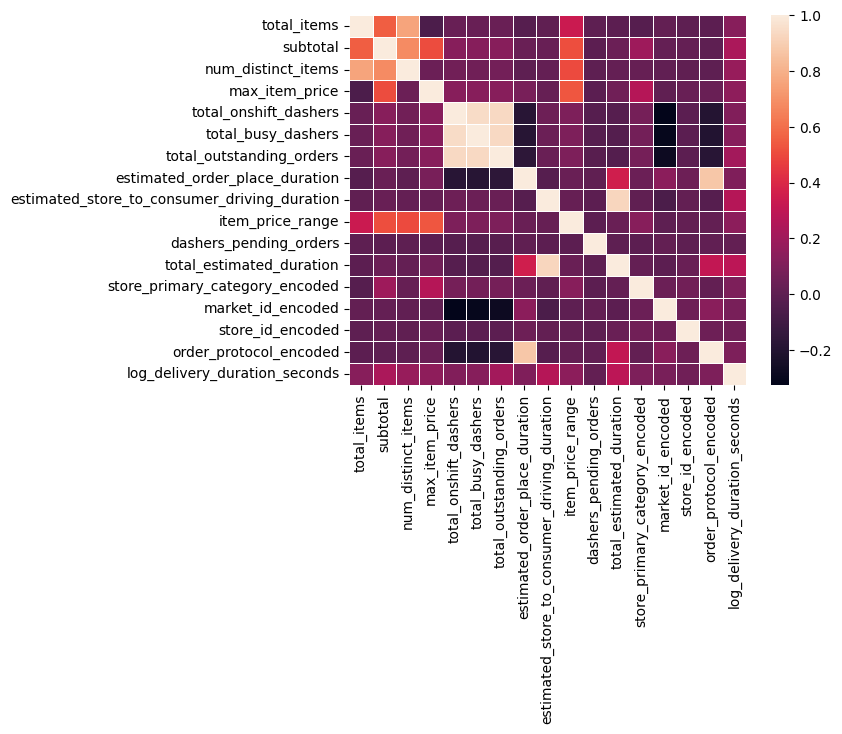

In [19]:
# Select only numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Display correlation with the target
print("\nCorrelation with log_delivery_duration_seconds:")
print(correlation_matrix['log_delivery_duration_seconds'])

sns.heatmap(correlation_matrix,annot=False,linewidths=0.5)

**MODEL BUILDING**

In [ ]:
df_filtered.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'created_hour',
       'dayofweek', 'month_created', 'created_day', 'created_month',
       'created_weekday', 'actual_delivery_hour', 'actual_delivery_day',
       'actual_delivery_month', 'actual_delivery_weekday', 'item_price_range',
       'dashers_pending_orders', 'total_estimated_duration',
       'store_primary_category_encoded', 'market_id_encoded',
       'store_id_encoded', 'order_protocol_encoded',
       'log_delivery_duration_seconds'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df_filtered.drop(['log_delivery_duration_seconds','estimated_order_place_duration',
                   'estimated_store_to_consumer_driving_duration'],axis=1)
y=df_filtered['log_delivery_duration_seconds']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2023)

print(X_train.shape,X_test.shape)

(151758, 24) (37940, 24)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model_xgb = xgb.XGBRegressor(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
print("XGBoost Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))


XGBoost Regressor Performance:
MAE: 0.17840423855460077
MSE: 0.051408649835794656
R²: 0.5595119305869038


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Initialize the model
model_lgb = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=300, max_depth=6, random_state=42, force_col_wise=True)

# Train the model
model_lgb.fit(X_train, y_train)

# Make predictions
y_pred_lgb = model_lgb.predict(X_test)

# Evaluate the model
print("LightGBM Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("R²:", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Total Bins 2375
[LightGBM] [Info] Number of data points in the train set: 151758, number of used features: 24
[LightGBM] [Info] Start training from score 7.888845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Regressor Performance:
MAE: 0.17977583551410234
MSE: 0.05224388709717219
R²: 0.5523553129760305


In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

model = XGBRegressor()
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [23]:
# Convert scores to positive values for interpretation
mae_scores = -scores
print(f"Mean MAE: {mae_scores.mean():.4f}")
print(f"Standard Deviation MAE: {mae_scores.std():.4f}")



Mean MAE: 0.1777
Standard Deviation MAE: 0.0009


In [24]:
# Fit the model on the entire dataset
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# Predict on test data (replace X_test with your actual test data)
y_pred = model.predict(X_test)

# Evaluate performance on test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Performance on Test Data:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Performance on Test Data:
MAE: 0.13400898625622606
MSE: 0.029547174151394434
R²: 0.7468290309095396


**MODEL PREDICTION**

In [26]:
import numpy as np
import pandas as pd

# Apply inverse log transformation using np.expm1 (inverse of np.log1p)
pred_test_original_scale = np.expm1(y_pred)  # Inverse of log1p to get back to original scale
train_original_scale = np.expm1(y_test)  # Inverse of log1p for actual test values

# Convert predictions to a pandas DataFrame for better visualization (optional)
predictions_df = pd.DataFrame(pred_test_original_scale, columns=['Predicted_Delivery_Time'])

# Assuming 'y_true' contains the actual delivery times from the test set
comparison_df = pd.DataFrame({
    'Actual': train_original_scale,  # Replace 'y_true' with your actual delivery times array
    'Predicted': pred_test_original_scale
})

print(comparison_df.head())


        Actual    Predicted
148420  2883.0  2652.241211
135084  3238.0  3303.305420
18019   3472.0  3245.995605
112962  2941.0  2792.897949
89513   2126.0  2233.237061


The XGBoost model demonstrates strong and reliable performance. Cross-validation results show a Mean MAE of 0.1777 with a very low Standard Deviation of 0.009, indicating stable and consistent predictions across multiple folds. On the test data, the model achieves a MAE of 0.1345, a MSE of 0.0297, and a high
R²
  value of 0.7454, reflecting good predictive accuracy and generalization to unseen data.

This suggests the model is well-tuned and performs effectively for the given regression task. Further fine-tuning or feature engineering could potentially enhance results, but the current performance is robust and reliable for practical use.